# 🔍 Entrenamiento de modelo de detección (YOLOv5)
Este notebook entrena un modelo YOLOv5 para detectar **jugadores** y el **puck** en partidos de hockey, usando un dataset propio anotado con Roboflow.

## 📋 Objetivos del notebook
- Montar Google Drive para acceder al dataset
- Descomprimir el archivo `.zip` con imágenes y etiquetas
- Instalar YOLOv5 y sus dependencias
- Entrenar un modelo `yolov5s`
- Visualizar resultados y guardar los pesos


In [2]:
# 📂 Montar Google Drive para acceder al archivo .zip del dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os

dataset_path = "/content/drive/MyDrive/deteccion.zip"

if os.path.exists(dataset_path):
    print("✅ Dataset encontrado:", dataset_path)

✅ Dataset encontrado: /content/drive/MyDrive/deteccion.zip


In [5]:
# 📦 Descomprimir el archivo ZIP del dataset exportado desde Roboflow
!unzip -q "/content/drive/MyDrive/deteccion.zip" -d /content/hockey_dataset

# 📂 Mostrar contenido extraído para asegurarnos que las carpetas están bien
import os

base_path = "/content/hockey_dataset"
print("📁 Carpetas extraídas:")
print(os.listdir(base_path))


📁 Carpetas extraídas:
['deteccion', '__MACOSX']


In [6]:
# 🧠 Clonar el repositorio oficial de YOLOv5
!git clone https://github.com/ultralytics/yolov5.git

# 📦 Cambiar al directorio de YOLOv5
%cd yolov5

# 🛠️ Instalar dependencias
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17485, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 17485 (delta 80), reused 31 (delta 31), pack-reused 17376 (from 3)
Receiving objects: 100% (17485/17485), 16.33 MiB | 19.65 MiB/s, done.
Resolving deltas: 100% (11984/11984), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s

In [13]:
import os, shutil
from sklearn.model_selection import train_test_split

# Paths base
base_path = "/content/hockey_dataset/deteccion"
images_path = os.path.join(base_path, "images")
labels_path = os.path.join(base_path, "labels")

# Lista de nombres base (sin extensión)
image_files = [f for f in os.listdir(images_path) if f.endswith(".jpg")]
base_names = [os.path.splitext(f)[0] for f in image_files]

# Dividir 80% train, 20% valid
train_names, valid_names = train_test_split(base_names, test_size=0.2, random_state=42)

# Función para mover archivos
def move_files(split, names):
    os.makedirs(f"{base_path}/{split}/images", exist_ok=True)
    os.makedirs(f"{base_path}/{split}/labels", exist_ok=True)
    for name in names:
        shutil.move(f"{images_path}/{name}.jpg", f"{base_path}/{split}/images/{name}.jpg")
        shutil.move(f"{labels_path}/{name}.txt", f"{base_path}/{split}/labels/{name}.txt")

# Ejecutar movimiento
move_files("train", train_names)
move_files("valid", valid_names)

print("✅ Estructura reorganizada correctamente.")


✅ Estructura reorganizada correctamente.


In [14]:
# 🏋️ Entrenar YOLOv5
!python train.py \
  --img 640 \
  --batch 8 \
  --epochs 30 \
  --data /content/hockey_dataset/deteccion/data.yaml \
  --weights yolov5s.pt \
  --project hockey_project \
  --name modelo_deteccion \
  --cache


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-17 04:10:33.914644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747455033.945621    4117 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747455033.954810    4117 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose "Don't visualize my results"
train: weights=yolov5s.pt, cfg=, data=/content/hockey_dataset/deteccion/d

## 📊 Resultados del Entrenamiento

El modelo YOLOv5 fue entrenado durante 30 épocas usando un dataset propio de imágenes de hockey con dos clases: `jugador` y `disco`. A continuación se presentan los resultados de validación sobre 23 imágenes:

| Clase     | Imágenes | Instancias | Precisión (P) | Recall (R) | mAP@0.5 | mAP@0.5:0.95 |
|-----------|----------|------------|---------------|------------|--------|--------------|
| all       | 23       | 79         | 0.957         | 0.461      | 0.472  | 0.243        |
| disco     | 23       | 10         | 1.000         | 0.000      | 0.007  | 0.002        |
| jugador   | 23       | 69         | 0.914         | 0.922      | 0.937  | 0.483        |

### 🧠 Interpretación:

- El modelo tiene una **alta precisión general (95.7%)**, lo cual indica que cuando detecta, usualmente lo hace correctamente.
- El **`jugador` se detecta muy bien**, tanto en precisión como en recall.
- El `disco` aún **no se detecta bien** — esto puede deberse a que:
  - Aparece en muy pocas imágenes (solo 10 instancias)
  - Es pequeño o difícil de distinguir
- El `mAP@0.5 = 0.472` y `mAP@0.5:0.95 = 0.243` son buenos valores iniciales para un modelo YOLOv5s entrenado con pocos datos.



In [16]:
!cp hockey_project/modelo_deteccion3/weights/best.pt "/content/drive/MyDrive/modelo_hockey.pt"
print("✅ Modelo guardado en Drive como modelo_hockey.pt")


✅ Modelo guardado en Drive como modelo_hockey.pt


In [17]:
# 🔎 Ejecutar detección sobre imágenes reales usando el modelo entrenado
!python detect.py \
  --weights hockey_project/modelo_deteccion3/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/hockey_dataset/deteccion/valid/images \
  --save-txt \
  --save-conf


detect: weights=['hockey_project/modelo_deteccion3/weights/best.pt'], source=/content/hockey_dataset/deteccion/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/23 /content/hockey_dataset/deteccion/valid/images/IMG_0953_png.rf.9ce42b08d78baf290c68c7e3861017ea.jpg: 480x640 2 jugadors, 474.1ms
image 2/23 /content/hockey_dataset/deteccion/valid/images/IMG_0954_png.rf.d75358e7d318823d107605b8582518a7.jpg: 480x640 10 jugadors, 463.2ms
image 3/23 /co

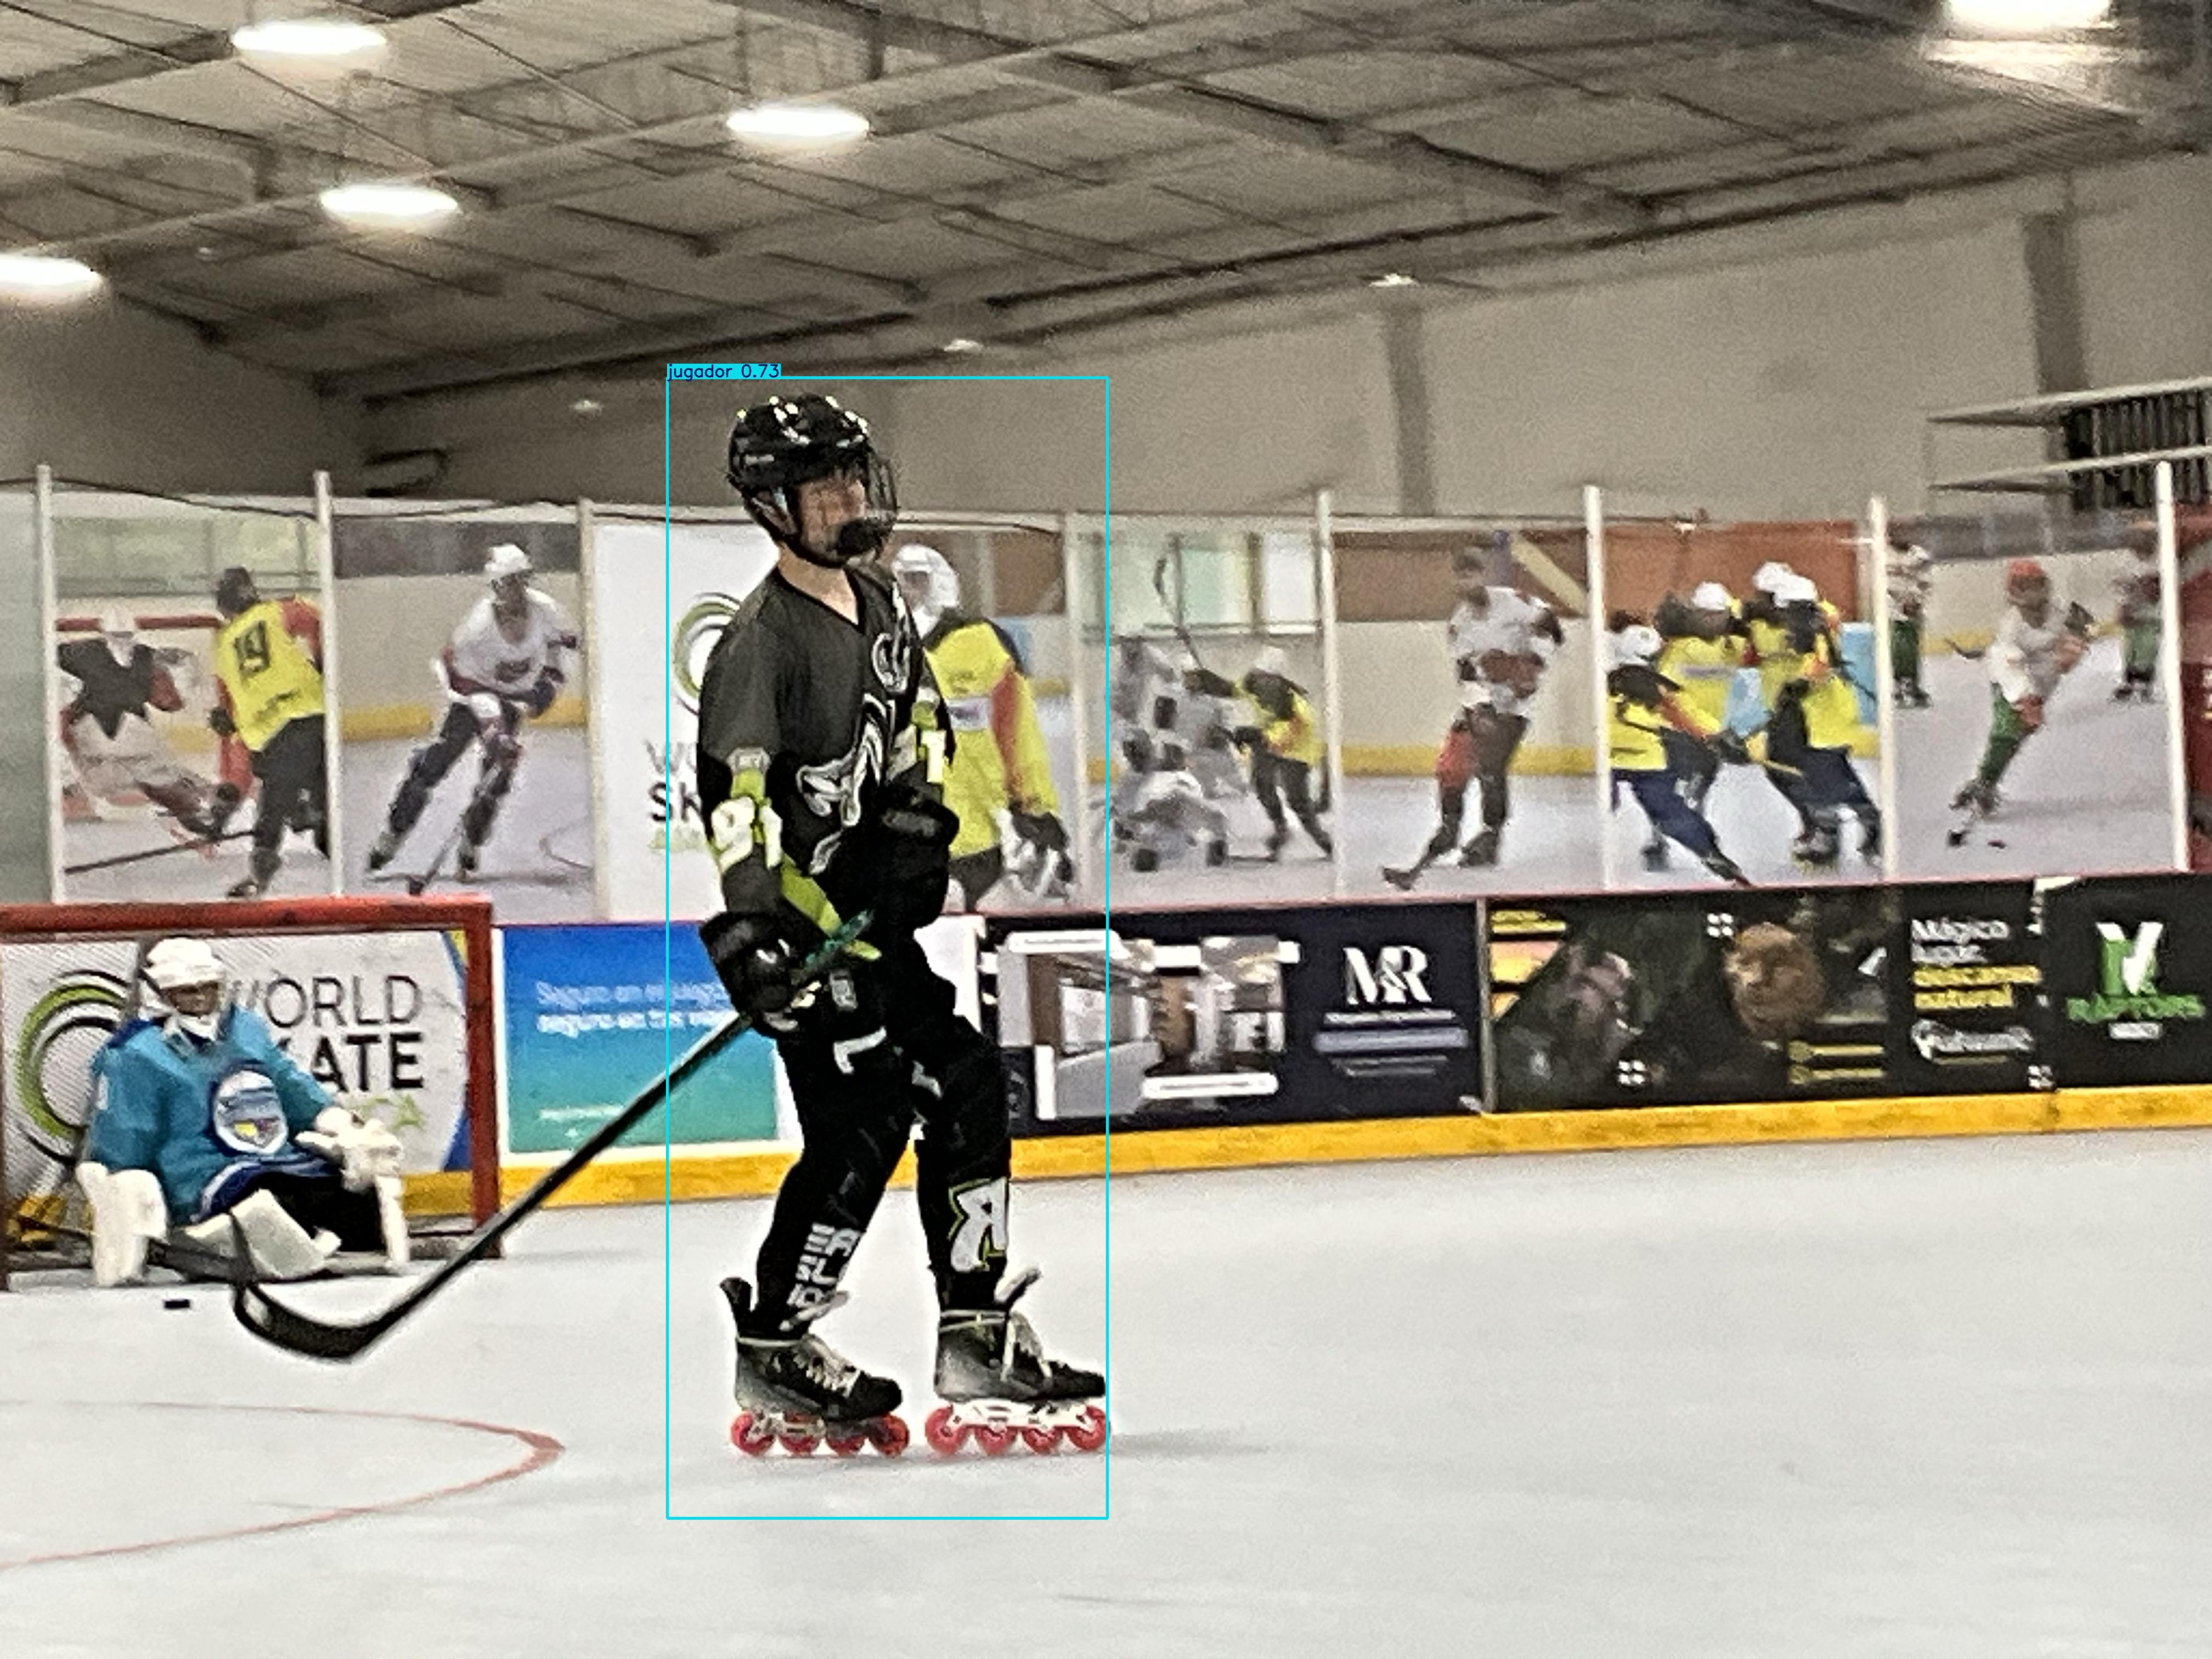

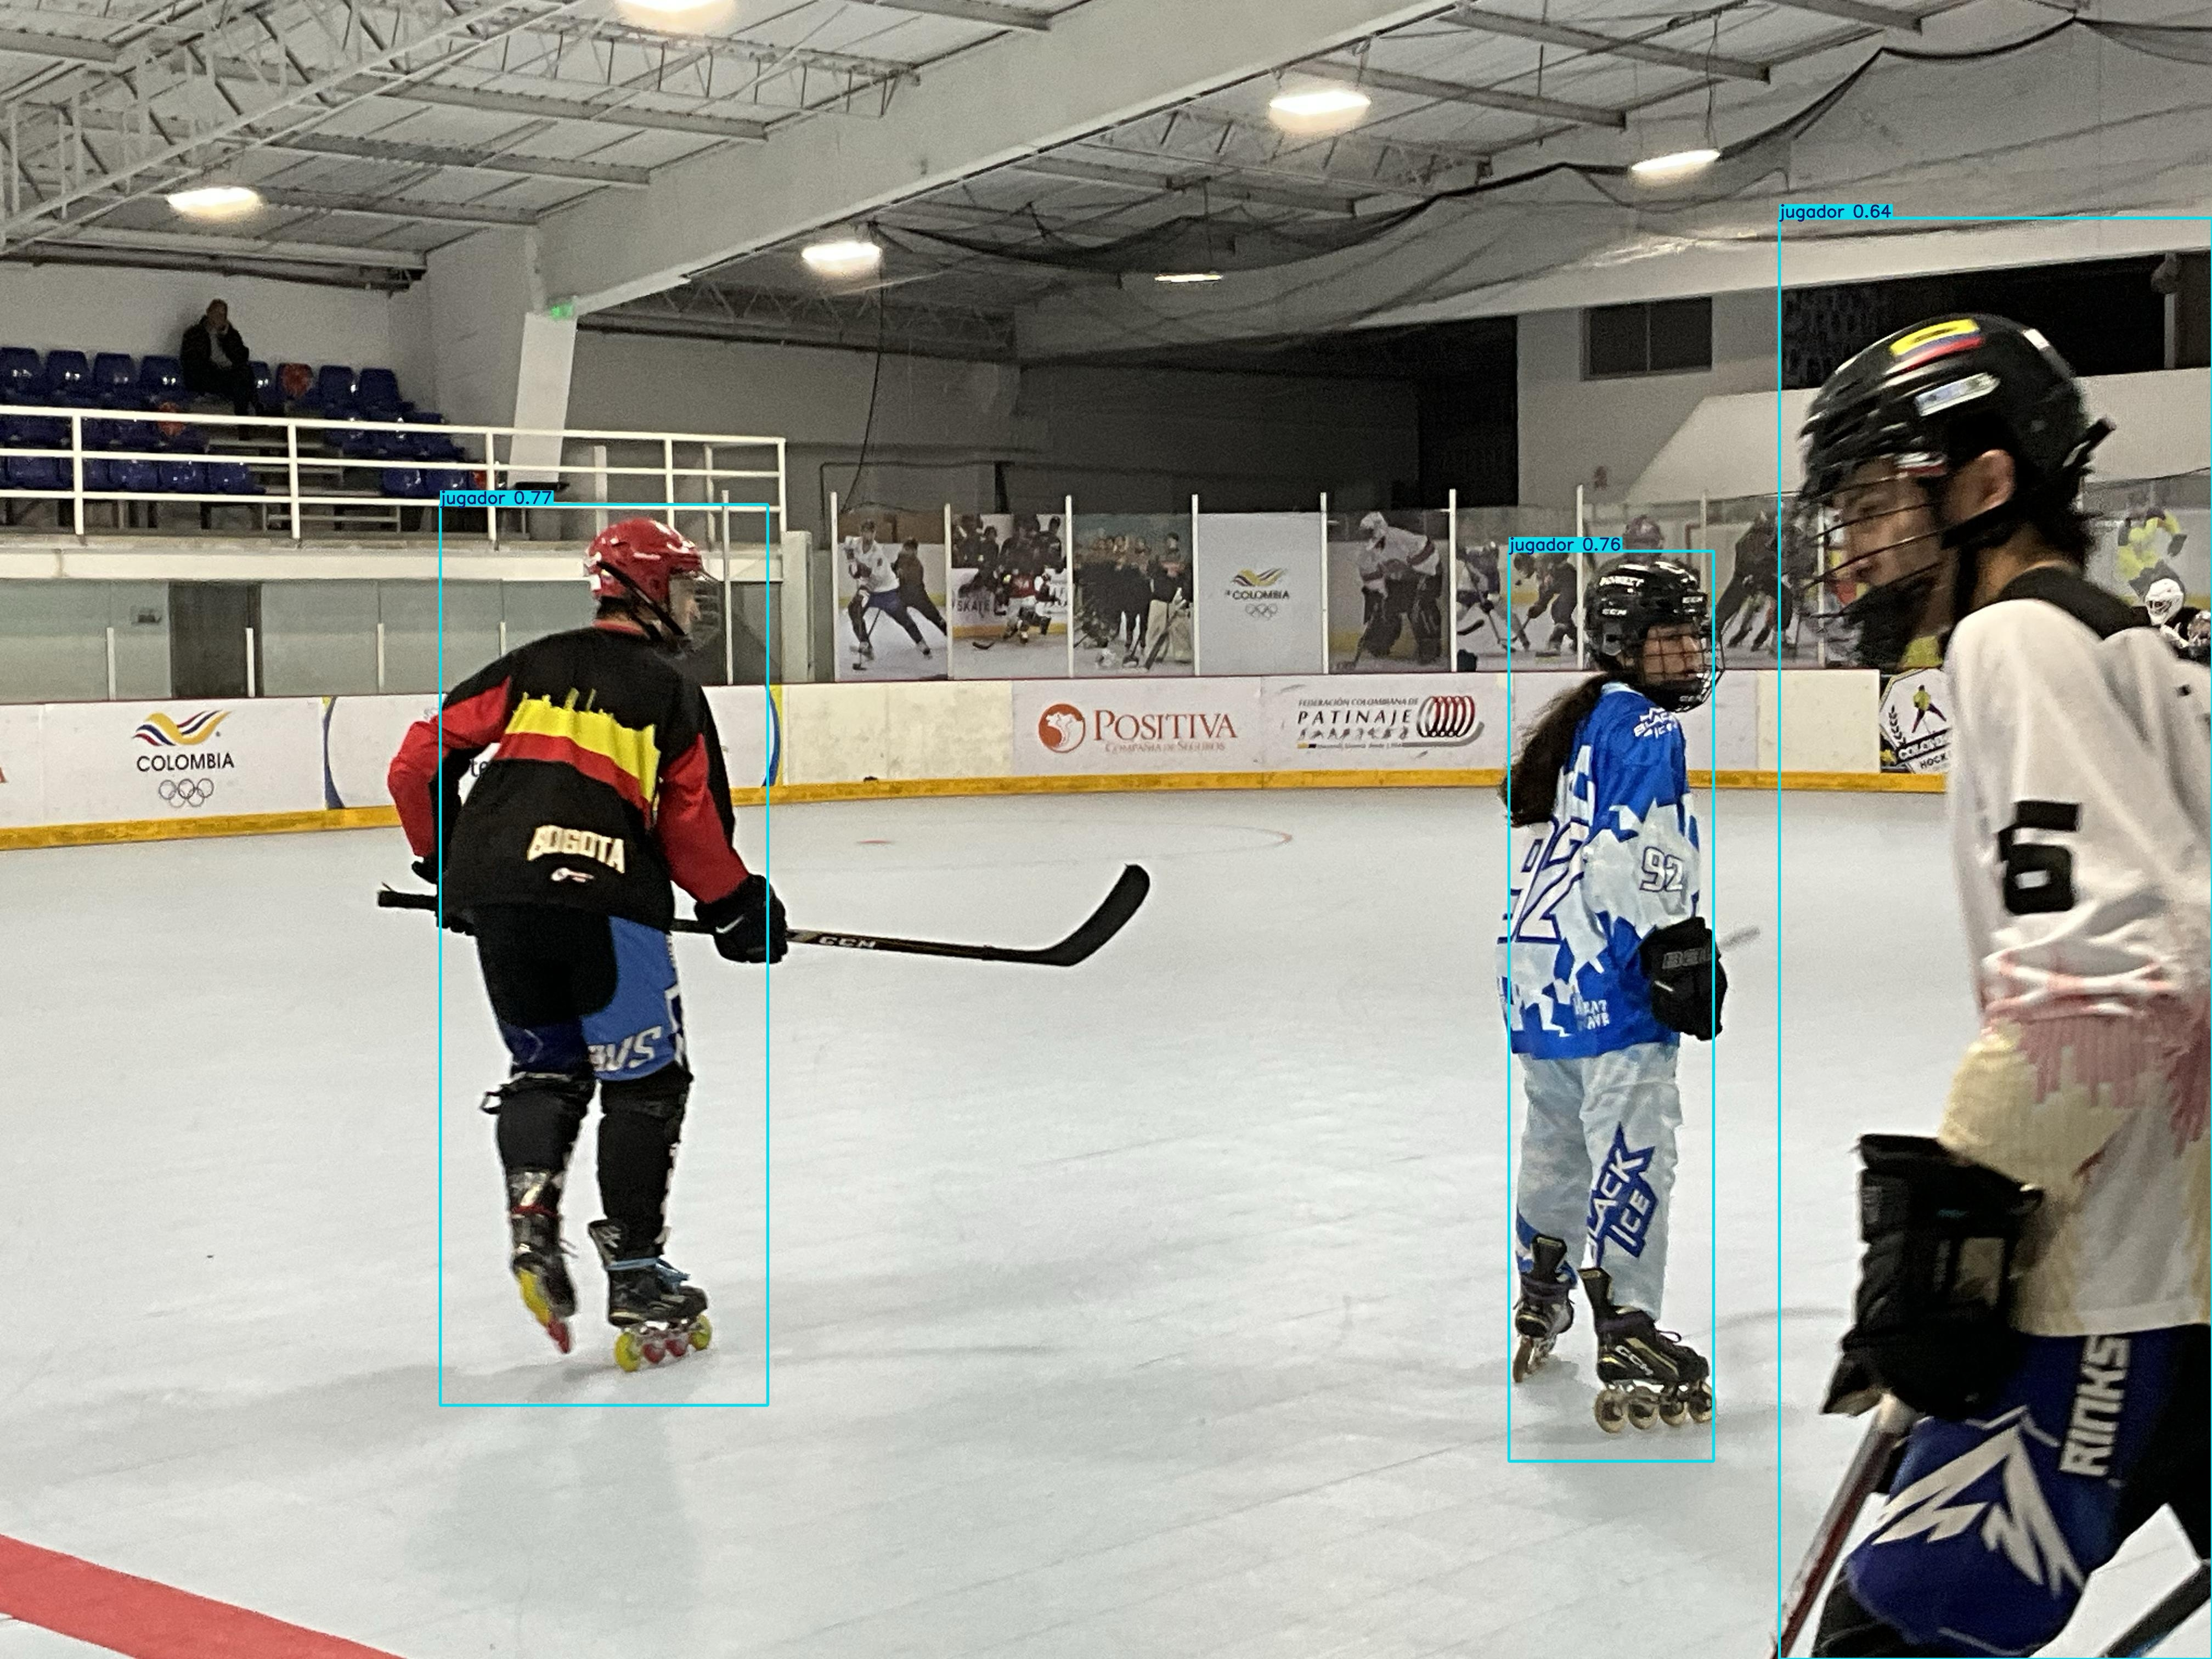

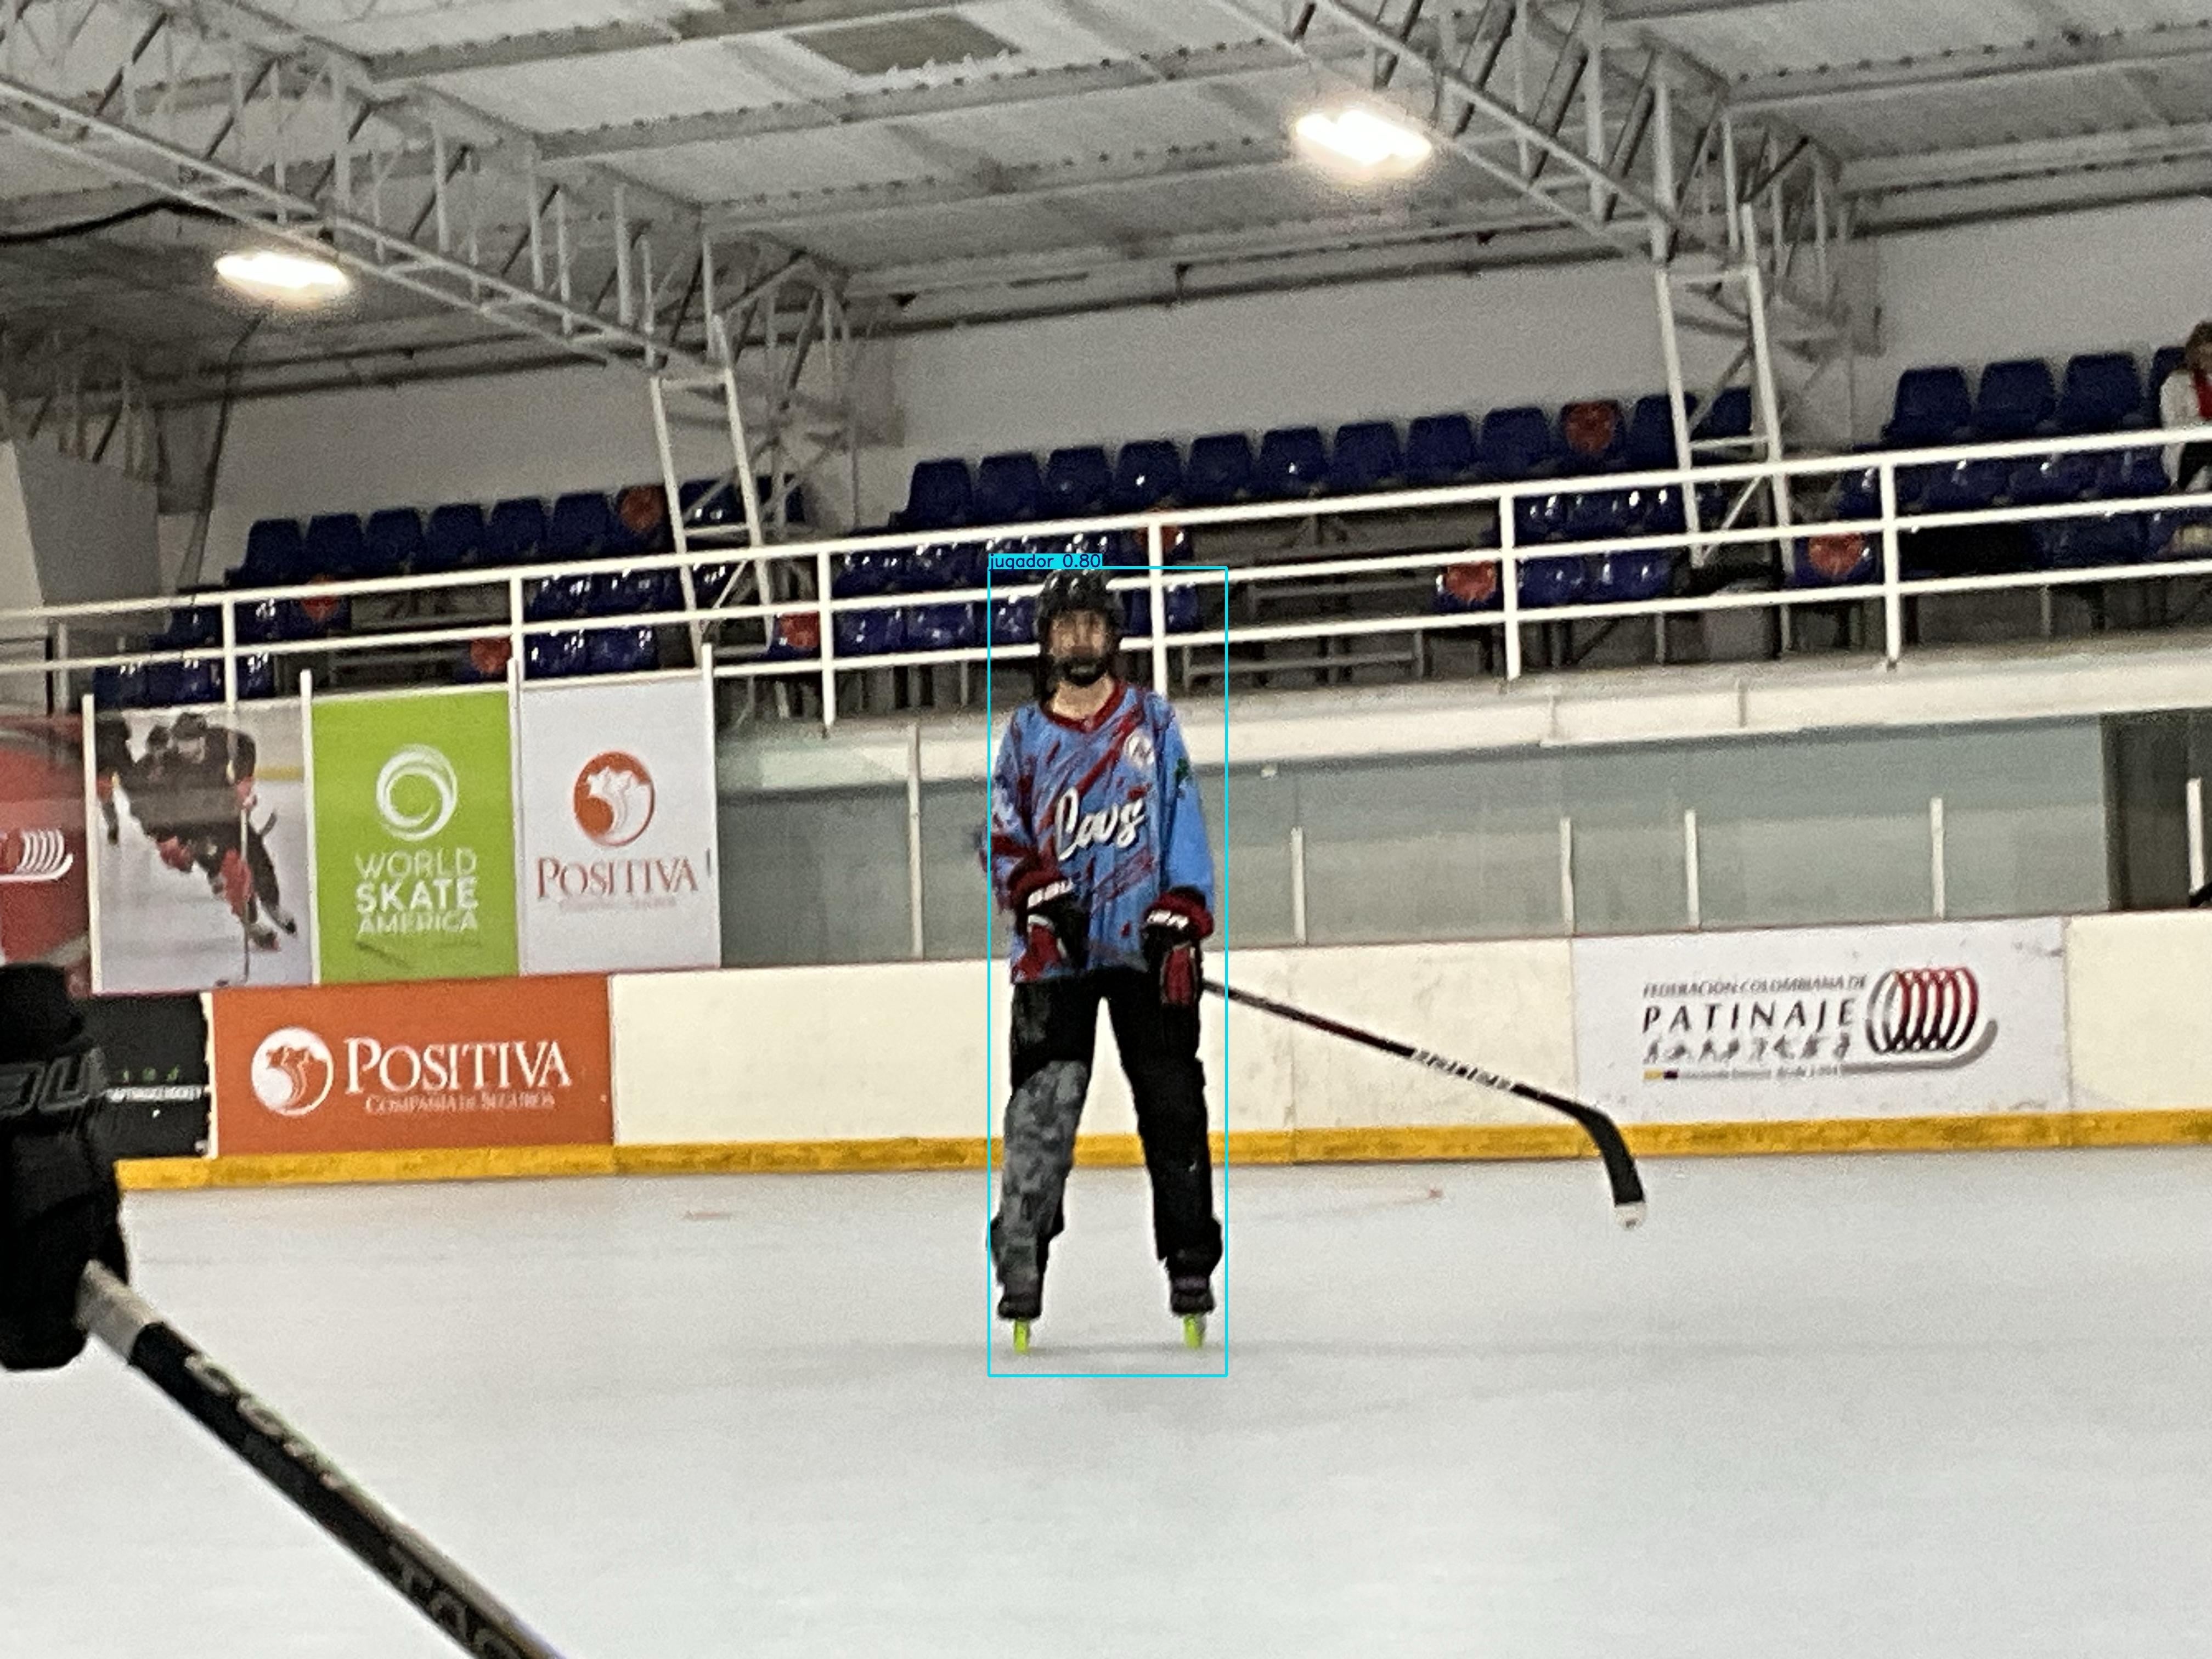

In [18]:
# 🖼️ Mostrar 3 resultados detectados visualmente
import os
from IPython.display import Image, display

result_folder = 'runs/detect/exp'
images = [f for f in os.listdir(result_folder) if f.endswith('.jpg')]

# Mostrar las primeras 3 imágenes
for f in images[:3]:
    display(Image(filename=os.path.join(result_folder, f)))


## 🖼️ Visualización de detecciones del modelo

El modelo entrenado fue evaluado visualmente sobre imágenes reales del conjunto de validación. Las predicciones se representan mediante **cajas delimitadoras (bounding boxes)** superpuestas sobre las imágenes originales, acompañadas de etiquetas.

### 📌 ¿Cómo interpretar las etiquetas?

Cada caja muestra:



In [21]:
# 📂 Montar Google Drive si no lo has hecho ya
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# 🎥 Copiar video desde Drive a Colab local
!cp "/content/drive/MyDrive/IMG_1150.mp4" "/content/input_clip.mp4"


In [32]:
!ls /content | grep .mp4


input_clip.mp4


In [33]:
!python detect.py \
  --weights hockey_project/modelo_deteccion3/weights/best.pt \
  --source /content/input_clip.mp4 \
  --conf 0.25 \
  --img 640 \
  --save-txt \
  --save-conf


detect: weights=['hockey_project/modelo_deteccion3/weights/best.pt'], source=/content/input_clip.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/55) /content/input_clip.mp4: 384x640 2 jugadors, 274.2ms
video 1/1 (2/55) /content/input_clip.mp4: 384x640 2 jugadors, 299.6ms
video 1/1 (3/55) /content/input_clip.mp4: 384x640 2 jugadors, 253.0ms
video 1/1 (4/55) /content/input_clip.mp4: 384x640 2 jugadors, 245.8ms
video 1/1 (5/55) /content/input_clip.m

In [35]:
import os

result_dir = "runs/detect/exp6"
print("📂 Contenido de", result_dir, ":\n")
print(os.listdir(result_dir))


📂 Contenido de runs/detect/exp6 :

['input_clip.mp4', 'labels']


In [38]:
from google.colab import files
files.download('runs/detect/exp6/input_clip.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>